<a href="https://colab.research.google.com/github/AlaynaMonteiro/Pesu_io_assignments/blob/main/ioassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **the** **Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing** **the** **dataset**

In [2]:
dataset = pd.read_csv('housing.csv')
x = dataset

In [3]:
print(x)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

**Feature Scaling**

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x)

**Applying PCA**

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_new = pca.fit_transform(x_1)

In [6]:
print(x_new)

[[ 2.34654276  0.34644059]
 [ 1.76136708  0.43812372]
 [ 2.33031157 -0.12620806]
 ...
 [ 0.68738046 -2.0567699 ]
 [ 0.82843475 -2.07324029]
 [ 0.77143988 -1.83274305]]


**Using the elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

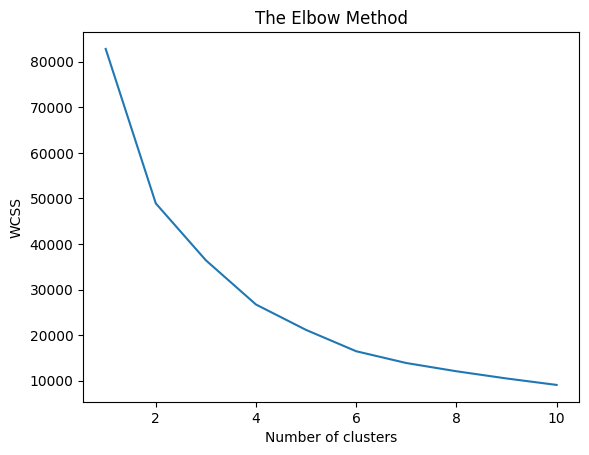

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-means model on the dataset**

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualising the clusters**

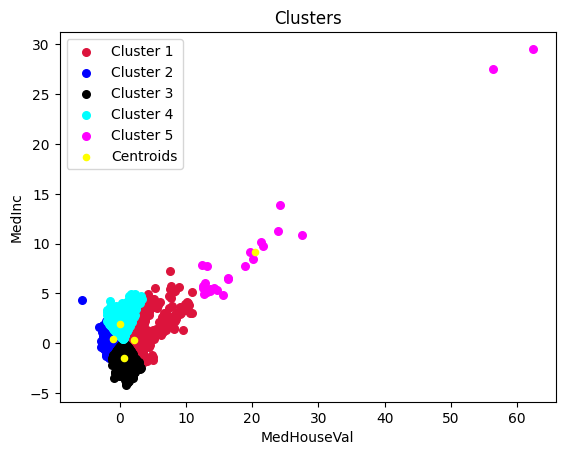

In [9]:
plt.scatter(x_new[y_kmeans == 0, 0], x_new[y_kmeans == 0, 1], s = 30, c = 'crimson', label = 'Cluster 1')
plt.scatter(x_new[y_kmeans == 1, 0], x_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(x_new[y_kmeans == 2, 0], x_new[y_kmeans == 2, 1], s = 30, c = 'black', label = 'Cluster 3')
plt.scatter(x_new[y_kmeans == 3, 0], x_new[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(x_new[y_kmeans == 4, 0], x_new[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('MedHouseVal')
plt.ylabel('MedInc')
plt.legend()
plt.show()